# FicZon Inc Sales Prediction:

## PROJECT GOAL:
1. Data exploration insights – Sales effectiveness.
2. ML model to predict the Lead Category (High Potential , Low Potential)

In [1]:
# Importing Essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sqlalchemy import create_engine

### Loading the data from the database

In [3]:
db_host = '18.136.157.135' # port:  3306
username = 'dm_team2'
user_pass = 'DM!$Team&27@9!20!'
db_name = 'project_sales'

conn = create_engine('mysql+pymysql://'+username+':'+user_pass+'@'+db_host+'/'+db_name)

In [4]:
conn.table_names()

<ipython-input-4-9ac9e62d0ee4>:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  conn.table_names()


['data']

In [5]:
'mysql+pymysql://'+username+':'+user_pass+'@'+db_host+'/'+db_name

'mysql+pymysql://dm_team2:DM!$Team&27@9!20!@18.136.157.135/project_sales'

In [6]:
query="select * from data"
data=pd.read_sql(query,conn)

In [7]:
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [8]:
data.isnull().sum()

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [9]:
data.Sales_Agent.unique()

array(['Sales-Agent-11', 'Sales-Agent-10', 'Sales-Agent-3',
       'Sales-Agent-4', 'Sales-Agent-9', 'Sales-Agent-7', '',
       'Sales-Agent-8', 'Sales-Agent-5', 'Sales-Agent-2',
       'Sales-Agent-12', 'Sales-Agent-1', 'Sales-Agent-6'], dtype=object)

In [10]:
data.to_csv('data.csv') #Saving the dataset to the local system

In [11]:
data=pd.read_csv('data.csv')

In [12]:
data.head()

,Unnamed: 0,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     7422 non-null   int64  
 1   Created        7422 non-null   object 
 2   Product_ID     7364 non-null   float64
 3   Source         7405 non-null   object 
 4   Mobile         5612 non-null   object 
 5   EMAIL          7422 non-null   object 
 6   Sales_Agent    7399 non-null   object 
 7   Location       7364 non-null   object 
 8   Delivery_Mode  7422 non-null   object 
 9   Status         7422 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 580.0+ KB


In [14]:
data.Product_ID.isnull().sum()

58

In [15]:
data.columns

Index(['Unnamed: 0', 'Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL',
       'Sales_Agent', 'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

In [16]:
# Univariate Analysis:
import sweetviz as sv
my_report = sv.analyze(data)## pass the original dataframe
my_report.show_html() 

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Univariate Insights:
       
     1.Created:       Its the date and time on which the sales transaction takes place
     2.Product_ID:    Its the ID number of the Company's Product which the sales_Agent has to deal with the customers
     3.Source:        Its the way of communication viz., website,call,live chat-direct but most of the deal happens through
                      call only.
     4.Mobile:        Its the contact number of the customer on which the sales occured or the communication attempted
     5.EMAIL:         Its the Email ID of the customer through which the quatation or other required documents have to be
                      sent
     6.Sales_Agent:   The medium or a person which connects customer with the company is the sales agent who directly deals
                      with the Valuable Customer and also solves querry regarding the sales deal.
     7.Location:      Its belongs to the place of a customer, from where he/she is talking or living.
     8.Delivery_Mode: Its the way of delivery of product which the company have availed for the customers,
                      there are 5 modes of deivery, out of which mode-5 is preffered mostly by the customer
     9.Status:        Its the status of the attempt whether the sales deal had been happened positively or negatively or
                      on-hold.

    

In [17]:
data.Created.value_counts()

10-05-2018 12:30    4
14-09-2018 12:00    4
26-09-2018 11:30    4
27-09-2018 11:00    4
15-10-2018 10:36    4
                   ..
11-07-2018 22:24    1
08-11-2018 12:25    1
23-07-2018 21:35    1
28-08-2018 10:55    1
09-10-2018 19:54    1
Name: Created, Length: 6752, dtype: int64

In [18]:
data.Product_ID.value_counts()

18.0    1711
15.0    1518
19.0    1189
9.0      992
27.0     739
5.0      487
10.0     168
1.0      105
20.0     102
25.0      90
21.0      66
2.0       38
12.0      36
26.0      31
14.0      27
11.0      12
22.0       8
17.0       7
6.0        7
3.0        7
8.0        6
13.0       5
16.0       3
24.0       3
23.0       2
0.0        2
28.0       1
7.0        1
4.0        1
Name: Product_ID, dtype: int64

In [19]:
data.Mobile.value_counts()

XXXXXXX       222
988XXXXXXX    211
984XXXXXXX    177
998XXXXXXX    125
994XXXXXXX    112
             ... 
717XXXXXXX      1
222XXXXXXX      1
510XXXXXXX      1
519XXXXXXX      1
043XXXXXXX      1
Name: Mobile, Length: 486, dtype: int64

In [20]:
data.EMAIL.value_counts()

#VALUE!               1701
sXXXXXXX@gmail.com     781
aXXXXXXX@gmail.com     445
rXXXXXXX@gmail.com     342
mXXXXXXX@gmail.com     305
                      ... 
hXXXXXXXa-tech.com       1
aXXXXXXXvinfra.com       1
kXXXXXXX2@yahoo.in       1
vXXXXXXXi@gmail.om       1
KXXXXXXXa.b@sc.com       1
Name: EMAIL, Length: 883, dtype: int64

In [21]:
data.columns

Index(['Unnamed: 0', 'Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL',
       'Sales_Agent', 'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

## Dropping columns which not relevent to the target variable
### 1.'Unnamed: 0' :- This is just a serial number of the transaction, so dont have relation with the data to process, hence will drop it

### 2. 'Created' :- This column is the date and time of the transaction and it is unique through every entry and dont have any strong relation with the target variable so will drop it.

### 3. 'Product_ID' :- Its the ID of the product which the sales agent deals with customers but the product ID doesn't affect the target variable, as it doesnt tells that the deal has been done or not.

### 4. 'Mobile' :- Its the contact number of the customer which is unique through every customer so need to drop it as it is not affecting the target variable.

### 5. 'EMAIL' :- It is also a way of contact with customer for documentation which is unique through each and every customer, So need to drop this feature as it is not relevent for target variable

In [22]:
data.drop(['Unnamed: 0','Created','Product_ID','Mobile','EMAIL'],axis=1,inplace=True)
data.head(10)

,Source,Sales_Agent,Location,Delivery_Mode,Status
0,Website,Sales-Agent-11,NaN,Mode-5,Open
1,Website,Sales-Agent-10,NaN,Mode-5,Open
2,Website,Sales-Agent-10,NaN,Mode-5,Open
3,Website,Sales-Agent-10,NaN,Mode-5,Open
4,Website,Sales-Agent-10,NaN,Mode-5,Open
5,Website,Sales-Agent-10,NaN,Mode-5,Open
6,Website,Sales-Agent-10,NaN,Mode-5,Open
7,Website,Sales-Agent-10,NaN,Mode-5,Open
8,Website,Sales-Agent-10,NaN,Mode-5,Open
9,Website,Sales-Agent-10,NaN,Mode-5,Open


In [23]:
# Checking missing values:
data.isnull().sum()

Source           17
Sales_Agent      23
Location         58
Delivery_Mode     0
Status            0
dtype: int64

In [24]:
data.Source.value_counts()

Call                             2547
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Other                               2
Live Chat-Quora                     2
Live Chat-Youtube                   2
SMS Campaign                        2
Live Chat-Justdial                  1
E-Mail Message                      1
Name: Source, dtype: int64

In [25]:
#Imputing missing values:
data.Source=data.Source.fillna('Call')

In [26]:
data.Sales_Agent.value_counts()

Sales-Agent-4     1500
Sales-Agent-11    1420
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      49
Sales-Agent-1        4
Name: Sales_Agent, dtype: int64

In [27]:
data.Sales_Agent=data.Sales_Agent.fillna('Sales-Agent-1')

In [28]:
data.Location.value_counts()

Other Locations    2500
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: Location, dtype: int64

In [29]:
data.Location=data.Location.fillna('Other Locations')

In [30]:
data.isnull().sum()

Source           0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [31]:
data.Source.unique()

array(['Website', 'Call', 'Live Chat-Google Organic', 'Live Chat-Direct',
       'By Recommendation', 'Customer Referral', 'Live Chat-Blog',
       'Live Chat -PPC', 'Live Chat-Google Ads',
       'Live Chat-Adwords Remarketing', 'E-Mail Message',
       'Existing Client', 'Live Chat-CPC', 'Existing Customer',
       'Live Chat-Quora', 'US Website', 'Just Dial', 'Campaign', 'Other',
       'E-mail Campaign', 'CRM form', 'SMS Campaign', 'Personal Contact',
       'Live Chat-Youtube', 'Live Chat-Justdial'], dtype=object)

In [32]:
#Combining the features of source, so that features count will be reduced
data.loc[data['Source']=='Live Chat-Google Organic','Source']='Live_chat'
data.loc[data['Source']=='Live Chat-Direct','Source']='Live_chat'
data.loc[data['Source']=='Live Chat-Blog','Source']='Live_chat'
data.loc[data['Source']=='Live Chat -PPC','Source']='Live_chat'
data.loc[data['Source']=='Live Chat-CPC','Source']='Live_chat'
data.loc[data['Source']=='Live Chat-Google Ads','Source']='Live_chat'
data.loc[data['Source']=='Live Chat-Adwords Remarketing','Source']='Live_chat'
data.loc[data['Source']=='Live Chat-Quora','Source']='Live_chat'
data.loc[data['Source']=='Live Chat-Youtube','Source']='Live_chat'
data.loc[data['Source']=='Live Chat-Justdial','Source']='Live_chat'
data.loc[data['Source']=='By Recommendation','Source']='Call'
data.loc[data['Source']=='Customer Referral','Source']='Call'
data.loc[data['Source']=='Existing Client','Source']='Call'
data.loc[data['Source']=='Existing Customer','Source']='Call'
data.loc[data['Source']=='Just Dial','Source']='Call'
data.loc[data['Source']=='Personal Contact','Source']='Call'
data.loc[data['Source']=='E-Mail Message','Source']='Website'
data.loc[data['Source']=='US Website','Source']='Website'
data.loc[data['Source']=='CRM form','Source']='Website'
data.loc[data['Source']=='E-mail Campaign','Source']='Website'
data.loc[data['Source']=='SMS Campaign','Source']='Website'
data.loc[data['Source']=='Other','Source']='Website'
data.loc[data['Source']=='Campaign','Source']='Website'

In [33]:
data.Source.value_counts()

Call         2955
Live_chat    2677
Website      1790
Name: Source, dtype: int64

In [34]:
data.head()

,Source,Sales_Agent,Location,Delivery_Mode,Status
0,Website,Sales-Agent-11,Other Locations,Mode-5,Open
1,Website,Sales-Agent-10,Other Locations,Mode-5,Open
2,Website,Sales-Agent-10,Other Locations,Mode-5,Open
3,Website,Sales-Agent-10,Other Locations,Mode-5,Open
4,Website,Sales-Agent-10,Other Locations,Mode-5,Open


In [35]:
data.Location.value_counts()

Other Locations    2558
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: Location, dtype: int64

In [36]:
#Combining the features of Location, so that the feature count will be reduced
data.loc[data['Location']=='UAE','Location']='International'
data.loc[data['Location']=='USA','Location']='International'
data.loc[data['Location']=='UK','Location']='International'
data.loc[data['Location']=='AUSTRALIA','Location']='International'
data.loc[data['Location']=='Singapore','Location']='International'
data.loc[data['Location']=='Malaysia','Location']='International'
data.loc[data['Location']=='EUROPE','Location']='International'

In [37]:
#Combining the features of Location, so that the feature count will be reduced
data.loc[data['Location']=='Bangalore','Location']='India'
data.loc[data['Location']=='Chennai','Location']='India'
data.loc[data['Location']=='Hyderabad','Location']='India'
data.loc[data['Location']=='Delhi','Location']='India'
data.loc[data['Location']=='Mumbai','Location']='India'
data.loc[data['Location']=='Pune','Location']='India'
data.loc[data['Location']=='Trivandrum','Location']='India'
data.loc[data['Location']=='Kokata','Location']='India'
data.loc[data['Location']=='Howrah','Location']='India'
data.loc[data['Location']=='Kolkata','Location']='India'

In [38]:
data.Location.value_counts()

India              4650
Other Locations    2558
International       214
Name: Location, dtype: int64

In [39]:
data.Sales_Agent.isnull().sum()

0

In [40]:
data.Status.value_counts()

Junk Lead               1536
Not Responding          1129
CONVERTED                834
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      82
converted                 18
Name: Status, dtype: int64

In [41]:
#Considering the features of 'Status' column into HIGH potential and LOW potential
data.loc[data['Status']=='Junk Lead','Status']='low_potential'
data.loc[data['Status']=='Not Responding','Status']='low_potential'
data.loc[data['Status']=='CONVERTED','Status']='high_potential'
data.loc[data['Status']=='Just Enquiry','Status']='low_potential'
data.loc[data['Status']=='Potential','Status']='high_potential'
data.loc[data['Status']=='Long Term','Status']='high_potential'
data.loc[data['Status']=='In Progress Positive','Status']='high_potential'
data.loc[data['Status']=='In Progress Negative','Status']='low_potential'
data.loc[data['Status']=='LOST','Status']='low_potential'
data.loc[data['Status']=='Open','Status']='high_potential'
data.loc[data['Status']=='converted','Status']='high_potential'

In [42]:
data.Status.value_counts()

low_potential     4491
high_potential    2931
Name: Status, dtype: int64

In [43]:
# Now conerting the categorical features into numerical one by labelencoder and OneHotEncoder techinque

In [44]:
data['Status']=data['Status'].map({'low_potential':0,'high_potential':1})

In [45]:
#Now applying labelencoder technique to column 'Sales_Agent' and 'Delivery_Mode' as it not having relation with the target variable
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
data['Source']=lc.fit_transform(data['Source'])
data['Location']=lc.fit_transform(data['Location'])
data['Sales_Agent']=lc.fit_transform(data['Sales_Agent'])
data['Delivery_Mode']=lc.fit_transform(data['Delivery_Mode'])

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Source         7422 non-null   int32
 1   Sales_Agent    7422 non-null   int32
 2   Location       7422 non-null   int32
 3   Delivery_Mode  7422 non-null   int32
 4   Status         7422 non-null   int64
dtypes: int32(4), int64(1)
memory usage: 174.1 KB


In [47]:
data

,Source,Sales_Agent,Location,Delivery_Mode,Status
0,2,2,2,4,1
1,2,1,2,4,1
2,2,1,2,4,1
3,2,1,2,4,1
4,2,1,2,4,1
...,...,...,...,...,...
7417,0,8,0,3,0
7418,0,3,2,4,0
7419,1,2,0,0,0
7420,2,6,2,0,0


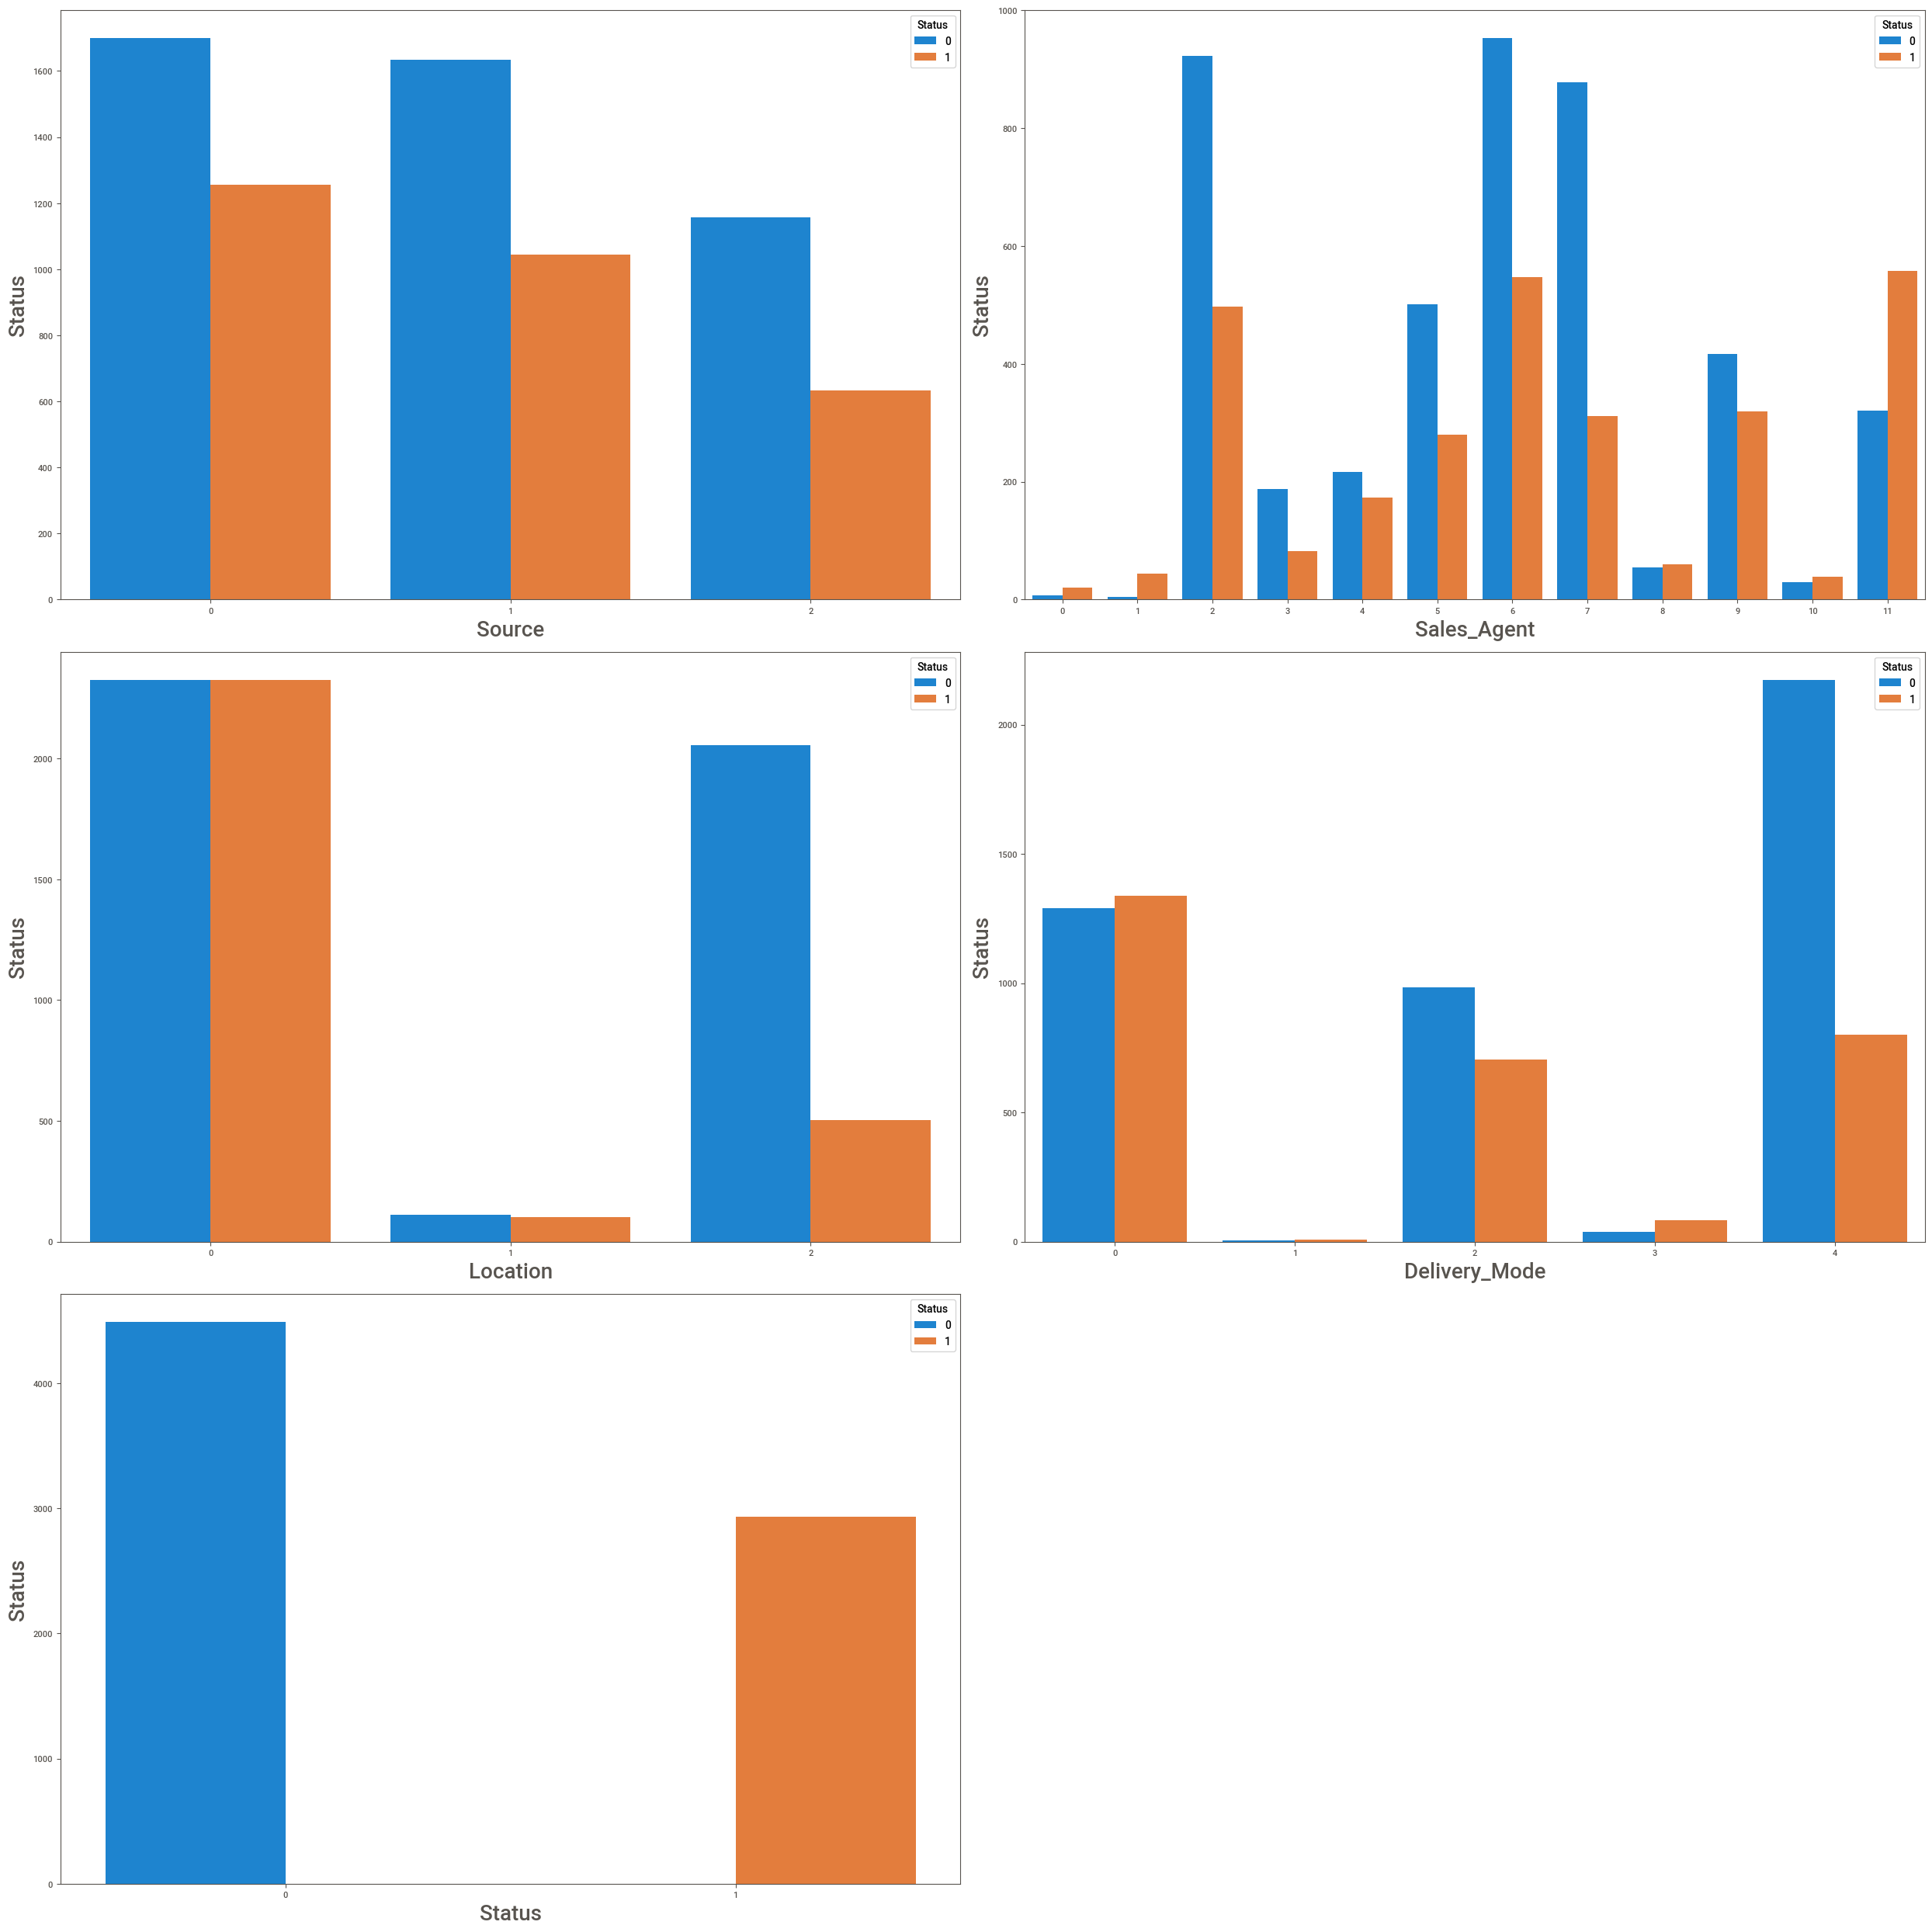

In [48]:
# Plotting how every categorical feature correlate with the "target"
plt.figure(figsize=(25,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=6 :
        ax = plt.subplot(3,2,plotnumber)
        sns.countplot(x=data[column].dropna(axis=0)
                        ,hue=data.Status)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Status',fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Bivariate Analysis:

1. Source of the Sales is most important in case of sales as the customers belonging to that location must be aware of trending products and supplies
2. Sales Agent must have convincing skillls, as you see agent 11 have more number of high potential than others, also agent2,5,6 working hard neglecting the case that they have low potential. like wise the agents must have training sessions according to their progress report.
3. Location makes a sense when you have a sales deal, agents have to be alloted in such a way that they must be knowing local languages where they are making sales deal
4. Delivery mode must be quick and fast as the customer feels trust when you give your service as per your said words, delaying the delivery will let the customer not to deal again in future.

## Model Creation and Evaluation:

In [49]:
# Defining dependent and independent variable
X=data.iloc[:,:-1]      #Independent variable
y=data.Status           #Dependent variable

In [50]:
X

,Source,Sales_Agent,Location,Delivery_Mode
0,2,2,2,4
1,2,1,2,4
2,2,1,2,4
3,2,1,2,4
4,2,1,2,4
...,...,...,...,...
7417,0,8,0,3
7418,0,3,2,4
7419,1,2,0,0
7420,2,6,2,0


In [51]:
y

0       1
1       1
2       1
3       1
4       1
       ..
7417    0
7418    0
7419    0
7420    0
7421    1
Name: Status, Length: 7422, dtype: int64

In [52]:
## scaling the data as all features seems to be near to normal distribution
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()## objet creation
X_scaled = scalar.fit_transform(X)

In [53]:
X_scaled

array([[ 1.47569609, -1.38768994,  1.35746352,  1.08745848],
       [ 1.47569609, -1.73649226,  1.35746352,  1.08745848],
       [ 1.47569609, -1.73649226,  1.35746352,  1.08745848],
       ...,
       [ 0.20020798, -1.38768994, -0.76048776, -1.21233262],
       [ 1.47569609,  0.00751932,  1.35746352, -1.21233262],
       [ 1.47569609, -0.341283  , -0.76048776, -1.21233262]])

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=42)

In [55]:
## Balancing the data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train,
                                                  y_train)

In [56]:
## Checking counts of y_train
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_train_smote))

Actual Classes Counter({0: 3380, 1: 2186})
SMOTE Classes Counter({0: 3380, 1: 3380})


## Logistic Regression:

In [57]:
##Model creation
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(X_train_smote,y_train_smote)

LogisticRegression()

In [58]:
y_pred = log_reg.predict(X_test)

In [59]:
#calculating the accuracy
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report,roc_auc_score,roc_curve
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.6449353448275862

In [60]:
#Classification Report
Report=classification_report(y_test,y_pred)
print(Report)

              precision    recall  f1-score   support

           0       0.77      0.58      0.66      1111
           1       0.54      0.74      0.63       745

    accuracy                           0.64      1856
   macro avg       0.66      0.66      0.64      1856
weighted avg       0.68      0.64      0.65      1856



In [61]:
#Cross-Validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg,X_scaled,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.67715973 0.74613336 0.67333266 0.66596228 0.67370037]
Cross validation Score: 0.6872576816182818
Std : 0.029663158810779282


## Decision Tree:

In [62]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=19)
dt.fit(X_train_smote,y_train_smote)
y_hat=dt.predict(X_test)

In [63]:
## Evalauting the model
from sklearn.metrics import accuracy_score,classification_report,f1_score
## Training score
y_train_predict=dt.predict(X_train)
acc_train=accuracy_score(y_train,y_train_predict)
acc_train

0.6990657563780094

In [64]:
y_pred=dt.predict(X_test)

In [65]:
f_score=f1_score(y_test,y_pred)
f_score

0.643312101910828

In [66]:
#Cross-Validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt,X_scaled,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.73674226 0.73732854 0.7155368  0.71938209 0.70361326]
Cross validation Score: 0.722520592185971
Std : 0.012943275354989863


In [67]:
# Hyperparameter tunning- Grid Search CV
from sklearn.model_selection import GridSearchCV
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train,y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")


Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'})


In [68]:
tree_cv.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

In [69]:
tree_cv.best_score_

0.5610990167602251

In [70]:
dt1=DecisionTreeClassifier(criterion='gini',max_depth=2,min_samples_leaf=1,min_samples_split=2,splitter='best')

In [71]:
dt1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [72]:
y_hat1=dt1.predict(X_test)

In [73]:
print(classification_report(y_test,y_hat1))

              precision    recall  f1-score   support

           0       0.64      0.96      0.77      1111
           1       0.78      0.19      0.30       745

    accuracy                           0.65      1856
   macro avg       0.71      0.58      0.53      1856
weighted avg       0.69      0.65      0.58      1856



## RandomForestClassifier:

In [74]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train_smote,y_train_smote)

RandomForestClassifier()

In [75]:
y_predict=rf_clf.predict(X_test)

In [76]:
from sklearn.metrics import accuracy_score,classification_report,f1_score
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73      1111
           1       0.60      0.70      0.65       745

    accuracy                           0.69      1856
   macro avg       0.69      0.69      0.69      1856
weighted avg       0.71      0.69      0.70      1856



In [77]:
f_Score=f1_score(y_test,y_predict)
f_Score

0.6472049689440994

## Hyperparameter tunning RandomSearch_CV

In [78]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 600, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 110, 'bootstrap': True})


In [79]:
rf_clf2 = RandomForestClassifier(**rf_best_params)
rf_clf2.fit(X_train, y_train)
y_predict=rf_clf2.predict(X_test)
f1_score=f1_score(y_test,y_predict)

In [80]:
f1_score

0.5752608047690014

### We got accuracy-
### 1. Logistic Regression : 64.49%
### 2. Decision Tree  :  69.42%
### 3. Random Forest   : 65.33%

## Conclusion:

### 1. The customers belonging to that location must be aware of trending products and supplies hence have to arrange promotional campaign.
### 2. The Agents must have training sessions according to their progress report to improve their convincing skills
### 3. Agents have to be given a region of sale according to their languages known so that customers feels them as a familiar person
### 4. Delivery mode must be quick and fast as the customer feels trust and faith on the company service.